In [4]:
# PyTorch computer vision

## 0. Computer vision libraries in pytroch

* 'torch.vision'- Deals with things having images
* 'torch.vision.datasets' - get datasets and data loading functions for computer vision
* 'torch.vision.models' - get pretrained computer vision models that can leverage for your own problems
* 'torchvision.transforms' - functions for manipulating your vision data (images) to be suitable for use with an ML model
* 'torch.utils.data.Dataset' - Base dataset class for pytorch
* 'torch.utils.data.DataLoaded'- Create a python iterable over a dataset

In [5]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1. Getting a dataset

Dataset -  FasionMNIST

In [6]:
# Setup training data

from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data',  # where to download
    train=True,   # do we want the training dataset
    download=True, # do we want to download yes/no
    transform= torchvision.transforms.ToTensor(),  # how do we want to transform the data
    target_transform=None  # how do we want tot transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12032587.79it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203389.22it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3744503.18it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5963070.14it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [7]:
len(train_data), len(test_data)

(60000, 10000)

In [8]:
# See first training example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [9]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.1 CHECK INPUT AND OUTPUT SHAPES OF DATA

In [11]:
# Check the sape of our image
image.shape, class_names[label]

# colour_channels, height, width

(torch.Size([1, 28, 28]), 'Ankle boot')

In [12]:
# here only one colour_channel bcz its greyscale image dataset

### 1.2 VISUALIZING OUR DATA

Image shape: torch.Size([1, 28, 28])


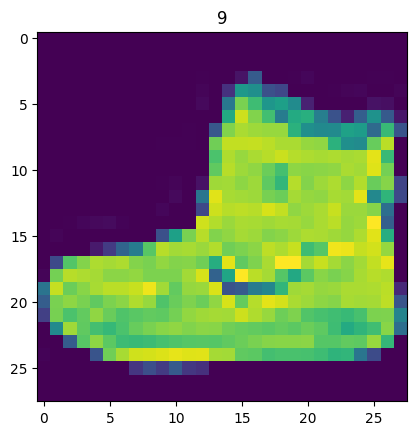

In [13]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label);

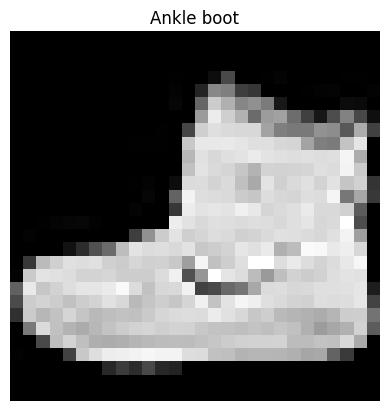

In [14]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);

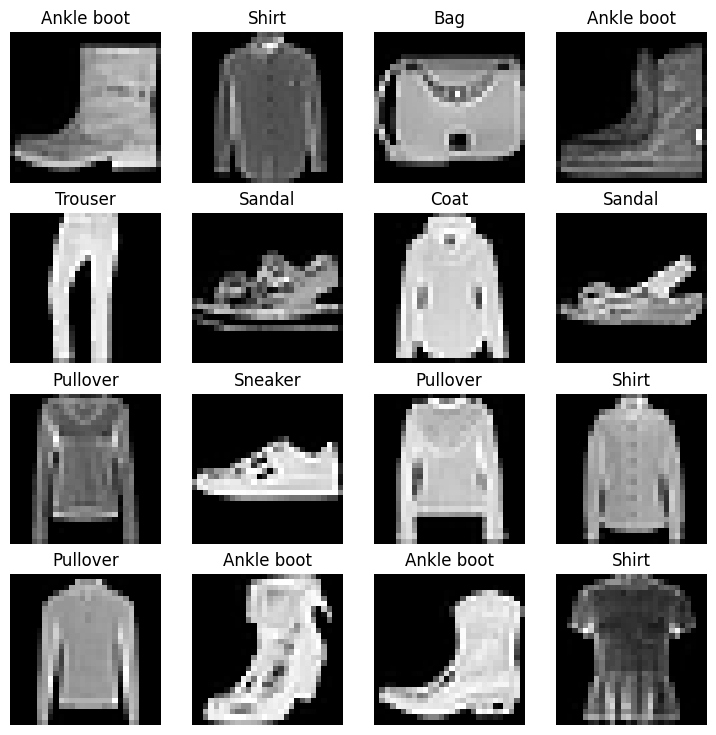

In [15]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Rn, our data is in the form of PyTorch Datasets

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches(or min-batches)

Why do we do it??

Ans -
1. It it more computatitonally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [16]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f3897aff8e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f3897affaf0>)

In [17]:
# Let's check out what we have created
print(f'DataLoader:{train_dataloader, test_dataloader}')
print(f'Length of train_dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test_dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoader:(<torch.utils.data.dataloader.DataLoader object at 0x7f3897aff8e0>, <torch.utils.data.dataloader.DataLoader object at 0x7f3897affaf0>)
Length of train_dataloader:1875 batches of 32
Length of test_dataloader:313 batches of 32


In [18]:
# This means that our model will look at 1875 batches of 32 images instead of 60000 together

In [19]:
# Check out whats inside the training dataloader
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:6, Label size:torch.Size([])


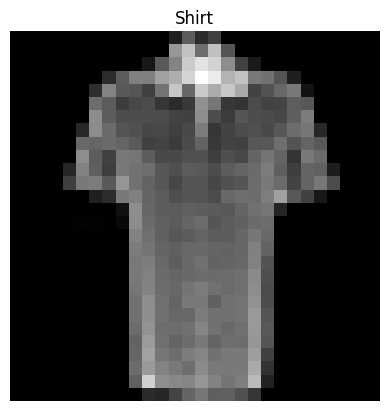

In [20]:
# Show a sample

torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size:{img.shape}')
print(f'Label:{label}, Label size:{label.shape}')

## 3. Model 0 : Build a basline model

When starting to build a series of machine learning modelling exp, its best to start with a basline model.

In [21]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [22]:
# lets flatten the sample
output = flatten_model(x) # perform forward pass

print(f'Shape before flattening:{x.shape}-> [color_channel, height, width]')
print(f'Shape after flattening:{output.shape }->[color_channel, height*width]')

Shape before flattening:torch.Size([1, 28, 28])-> [color_channel, height, width]
Shape after flattening:torch.Size([1, 784])->[color_channel, height*width]


In [23]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
             input_shape: int,
             hidden_units: int,
             output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [24]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # 28*28 - Ouput of flatten needs to be input of linear layer
    hidden_units = 10, # how many units in the hidden layer
    output_shape = len(class_names) # one for every class
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we are working with multi-class data, loss function will be 'nn.CrossEntropyLoss()'.

* Optimizer - SGD()
* Evaluation metric -  Accuracy()

In [25]:
import requests
from pathlib import Path

# Download helper function from Learn Pytorch repo
if Path('helper_functions.py').is_file():
  print('Helper_function.py already exists, skipping download')
else:
  print('Helper_function.py does not exits, downloading')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

Helper_function.py does not exits, downloading


In [26]:
from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn

In [27]:
# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our expereiments

ML is very experimental.

Two main thing to keep track:
1. Model performance (loss and accuracy values)
2. How fast it runs

In [28]:
from timeit import default_timer as timer

def print_train_timer(start: float,
                     end: float,
                     device: torch.device = None):
  """ Prints difference between start and end time"""

  total_time = end - start
  print(f'Train time on {device}:{total_time:.3f} seconds')
  return total_time

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [29]:
# Import tqdm for progress bar

from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we keep it small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch:{epoch}\n----')

  ### Training
  train_loss = 0

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step - Models parameters are updated per batch in place of per epochs
    optimizer.step()

    # Print out what's happening
    if batch%400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')

  # Divide total train loss by lenght of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate acc
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /=len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f'\nTrain loss:{train_loss:.4f}| Test loss:{test_loss:.4f}|Test acc:{test_acc:.2f}%')


# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_timer(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:0.5904| Test loss:0.5095|Test acc:82.04%
Epoch:1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:0.4763| Test loss:0.4799|Test acc:83.20%
Epoch:2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:0.4550| Test loss:0.4766|Test acc:83.43%
Train time on cpu:28.853 seconds


## 4. Make predictions and get Model 0 results

In [30]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn):
  '''Returns a dictionary containing the results of model predicting on data loader'''
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Sacle loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__,# only works when model was created with class
          'model_loss': loss.item(),
          'model_acc':acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code ( for using a GPU if there is one)

In [31]:
# Setup device agnostic-code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model 1:Building model with non-linearity


In [32]:
# Create a model with linear and non-linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [33]:
# Create an instance of model_1
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [34]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [35]:
### 6.1 Setup loss, optimizer and evaluation metrics

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

In [36]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  ''' Perform a training with model trying to learn on data_loader'''
  train_loss, train_acc = 0,0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate the loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%')


In [37]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
  '''Performs a testing loop step on model going over data_loader'''
  test_loss, test_acc = 0,0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test loss:{test_loss:.5f}| Test acc:{test_acc:.5f}%')

In [38]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimizer and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n----')
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_timer(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train loss: 1.09199 | Train acc: 61.34%
Test loss:0.95636| Test acc:64.99601%
Epoch: 1
----
Train loss: 0.78101 | Train acc: 71.93%
Test loss:0.72227| Test acc:73.91174%
Epoch: 2
----
Train loss: 0.67027 | Train acc: 75.94%
Test loss:0.68500| Test acc:75.01997%
Train time on cuda:31.359 seconds


In [39]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [40]:
total_train_time_model_0

28.853078959999948

Note : Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why?
1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
2. The hardware you're using has a better CPU in terms compute capability than the GPU.

In [41]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn,
               device=device):
  '''Returns a dictionary containing the results of model predicting on data loader'''
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Sacle loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__,# only works when model was created with class
          'model_loss': loss.item(),
          'model_acc':acc}

In [42]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [43]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN- Aka ConvNets

CNN known for capabilities to find patterns in data

In [44]:
# Create a CNN

class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Values we can set outselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=(hidden_units*7*7), # there is a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f'Output shape of conv_block_1: {x.shape}')
    x = self.conv_block_2(x)
    #print(f'Output shape of conv_block_2: {x.shape}')
    x = self.classifier(x)
    #print(f'Output shape of classifier: {x.shape}')
    return x


In [45]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [46]:
# Create a random tensor with same shape as image in dataset to test our model
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [47]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through nn.Conv2d()

In [48]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f'Image batch shape:{images.shape}')
print(f'Single image shape:{test_image.shape}')
print(f'Test image:\n{test_image}')

Image batch shape:torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.79

In [49]:
torch.manual_seed(42)
# Create a single conv2d layer

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through nn.MaxPool2d()

In [50]:
# Print out original image shape
print(f'Test image orinignal shape:{test_image.shape}')
print(f'Test image with unsqueezed dimension:{test_image.unsqueeze(0).shape}')

# Create a sample nn.Maxpool2d layer

max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through just the conv layer
test_image_through_cov = conv_layer(test_image)
print(f'Shape after going through conv_layer():{test_image_through_cov.shape}')

# Pass data throught the max pool layer
test_image_through_cov_and_max_pool = max_pool_layer(test_image_through_cov)
print(f'Shape after going through conv layer and max pool layer:{test_image_through_cov_and_max_pool.shape}')

Test image orinignal shape:torch.Size([3, 64, 64])
Test image with unsqueezed dimension:torch.Size([1, 3, 64, 64])
Shape after going through conv_layer():torch.Size([10, 62, 62])
Shape after going through conv layer and max pool layer:torch.Size([10, 31, 31])


### 7.3 Setup a loss function and optimizer for model_2


In [51]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing model_2 using training and test functions

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch:{epoch}\n----')
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_timer(start = train_time_start_model_2,
                                             end=train_time_end_model_2,
                                             device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
----
Train loss: 0.59154 | Train acc: 78.44%
Test loss:0.40159| Test acc:85.68291%
Epoch:1
----
Train loss: 0.35756 | Train acc: 87.10%
Test loss:0.34866| Test acc:87.39018%
Epoch:2
----
Train loss: 0.31471 | Train acc: 88.68%
Test loss:0.31505| Test acc:88.92772%
Train time on cuda:37.624 seconds


In [53]:
# Get model_2 results

model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31504714488983154,
 'model_acc': 88.92771565495208}

## 8. Compare model results and training time

In [54]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.315047,88.927716


In [55]:
# Add training time to results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,28.853079
1,FashionMNISTModelV1,0.685001,75.019968,31.358968
2,FashionMNISTModelV2,0.315047,88.927716,37.624065


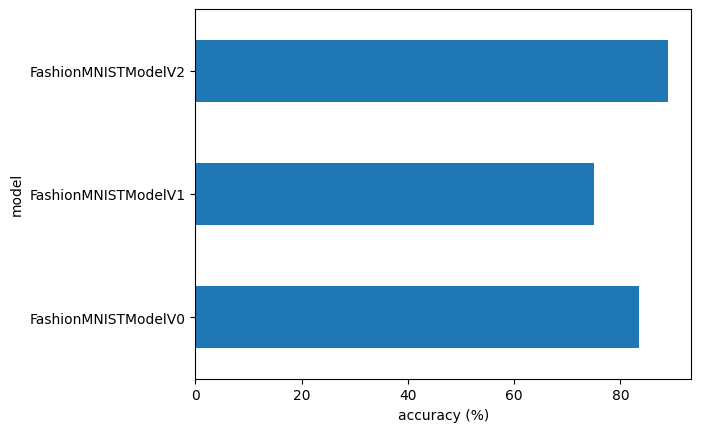

In [56]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model');

## 9. Make and evaluate random predictions with best model

In [57]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample(add a batch dimension and pass to target devices)
      sample = torch.unsqueeze(sample,dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit ->prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred probs to turn list into a tensor
  return torch.stack(pred_probs)

In [58]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

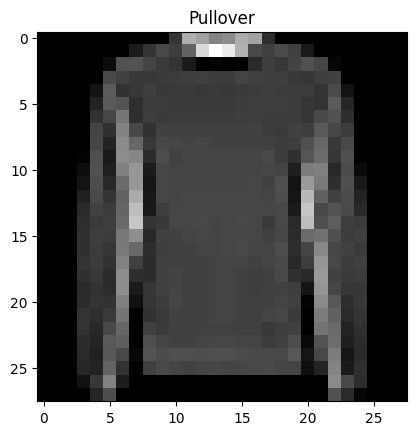

In [59]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]]);

In [60]:
# Make predictions

pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two predictions probabilities
pred_probs[:2]

tensor([[1.2392e-02, 1.3261e-04, 9.1791e-01, 3.8638e-04, 1.2859e-02, 3.5374e-05,
         5.5628e-02, 6.2039e-05, 4.5021e-04, 1.4538e-04],
        [1.2700e-05, 1.3390e-06, 8.8485e-06, 9.5238e-06, 1.3291e-05, 9.9950e-01,
         2.9243e-05, 9.9490e-05, 3.1424e-04, 1.0699e-05]])

In [61]:
# Convert prediction probabilites to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 5, 7, 1, 1, 8, 2, 4, 7])

In [62]:
test_labels

[2, 5, 7, 1, 1, 8, 2, 4, 7]

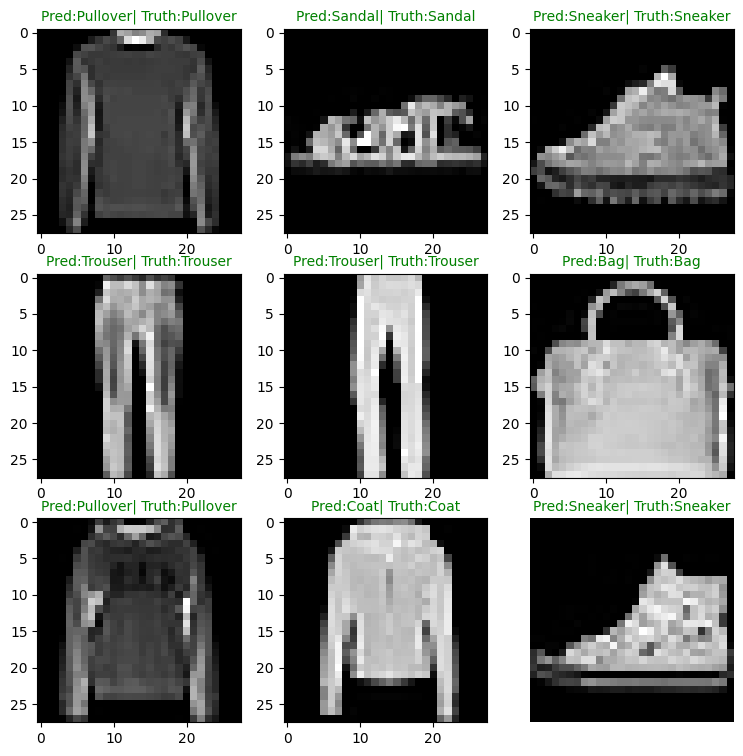

In [63]:
# Plot predcitions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap='gray')

  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f'Pred:{pred_label}| Truth:{truth_label}'

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

plt.axis(False);


## 10. Making a confusion matrix for further prediction evaulation


1. Make predictions with our trained model on the test dataset.
2.  Make a confusion matrix 'torch.metrics.ConfusionMatrix'.
3. Plot the confusion matrix using 'mlxtend.plotting.plot_confusion_matrix()'.

In [67]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making predictions...'):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions  from logits-> predcition probabilities->prediction labels
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    # Put precitions on CPU for evaulation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [71]:
# See if required packages are installed and if not, install them....

try:
  import torchmetrics, mlxtend
  print(f'mltend version:{mlxtend.__version__}')
  assert int(mlxtend.__version__.split('.')[1])>=19, 'mlxtend version should be 0.19.0 or higher'
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f'mlxtend version:{mlxtend.__version__}')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.6 MB/s eta 0:00:00
mlxtend version:0.22.0


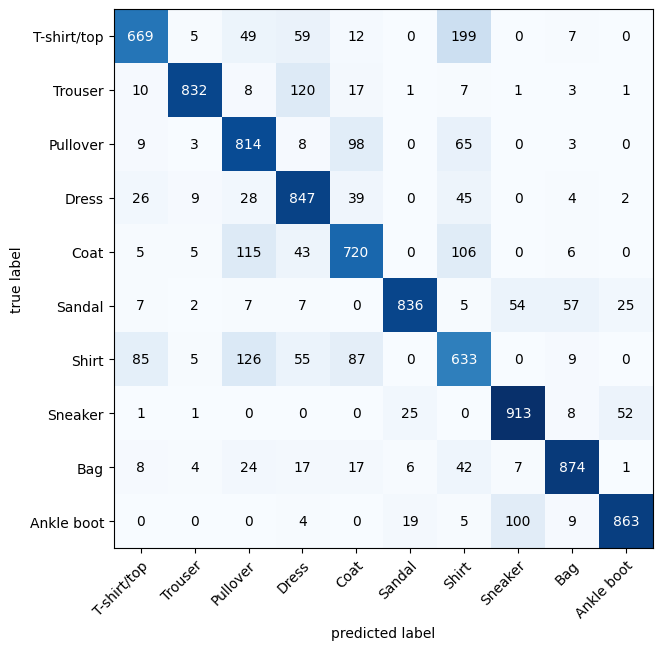

In [73]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotplib works with numpy
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and load best performing model

In [74]:
from pathlib import Path

# Create model dictory path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Save the model state dict
print(f'Saving model to:{MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to:models/03_pytorch_computer_vision_model_2.pth


In [75]:
# Create a new instance

torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [76]:
# Evaluate loaded model

torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [77]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31504714488983154,
 'model_acc': 88.92771565495208}

In [78]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31504714488983154,
 'model_acc': 88.92771565495208}

In [79]:
# Check if model results are close to each other

torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-02)

tensor(True)